In [1]:
import numpy as np
import pandas
from keras.layers import *
from keras.models import Sequential, Model
import keras
import matplotlib.pyplot as plt

Using TensorFlow backend.
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
def zeroMean(dataMat):        
    meanVal=np.mean(dataMat,axis=0)     #get mean by columns
    newData=dataMat-meanVal  
    return newData,meanVal


def percentage2n(eigVals,percentage):  
    sortArray=np.sort(eigVals)          #ascend order 
    sortArray=sortArray[-1::-1]           
    arraySum=sum(sortArray)  
    tmpSum=0  
    num=0  
    for i in sortArray:  
        tmpSum+=i  
        num+=1  
        if tmpSum>=arraySum*percentage:  
            return num  


def pca(dataMat,percentage=0.99):  
    newData,meanVal=zeroMean(dataMat)  
    covMat=np.cov(newData,rowvar=0)      #covariance  
    eigVals,eigVects=np.linalg.eig(np.mat(covMat))      
    n=percentage2n(eigVals,percentage)                 #need n dimensionol data to get the convariance percentage
    n = 6   # pca of 2017 rookies data is 6 dimentional 
    eigValIndice=np.argsort(eigVals)            #ascend order 
    n_eigValIndice=eigValIndice[-1:-(n+1):-1]   
    n_eigVect=eigVects[:,n_eigValIndice]        
    lowDDataMat=newData*n_eigVect               #lower dimensional data  
    reconMat=(lowDDataMat*n_eigVect.T)+meanVal  #reconstruct data  
    return lowDDataMat,reconMat

In [3]:
df = pandas.read_csv("04-16_NBA_rookies_data.csv", header=None)
df1 = pandas.read_csv("04-16_NBA_rookies_label.csv",header=None)
df_test = pandas.read_csv("2017rookies_data.csv",header=None)
df1_test = pandas.read_csv("2017rookies_name.csv",header=None)
ds = df.values
ds1 = df1.values
lowDDataMat,reconMat=pca(ds)  #pca
ds_test = df_test.values
lowDDataMat1,reconMat1=pca(ds_test)  #pca
ds1_test = df1_test.values

In [4]:
x_train = lowDDataMat[:,0:6]
y_train = ds1[:,1]
x_test = lowDDataMat1[:,0:6]
y_test = ds1_test[:,0]

dim = x_train.shape[1]
model = Sequential()
model.add(Dense(100, input_dim=dim, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop',metrics=["accuracy"])

In [5]:
# Change log_dir for differnt activation function, change the number for every run.
tbCallBack = keras.callbacks.TensorBoard(log_dir='tensorboard/relu/2', histogram_freq=0, write_graph=True, write_images=True)

In [6]:
idx = list(range(x_train.shape[0]))
np.random.shuffle(idx)
hist = model.fit(x_train[idx],y_train[idx],validation_split=0.2,epochs=85,shuffle=True, callbacks = [tbCallBack])
dnn_predict = model.predict_classes(x_test)
print(sum(dnn_predict))
print(y_test[dnn_predict == 1])

Train on 359 samples, validate on 90 samples
Epoch 1/85
359/359 [==============================] - 0s 130us/step - loss: 0.9723 - acc: 0.5460 - val_loss: 0.5842 - val_acc: 0.7000
Epoch 2/85
359/359 [==============================] - 0s 44us/step - loss: 0.7058 - acc: 0.6630 - val_loss: 0.4830 - val_acc: 0.8222
Epoch 3/85
359/359 [==============================] - 0s 841us/step - loss: 0.6483 - acc: 0.7131 - val_loss: 0.4647 - val_acc: 0.8111
Epoch 4/85
359/359 [==============================] - 0s 55us/step - loss: 0.5929 - acc: 0.7409 - val_loss: 0.4509 - val_acc: 0.8222
Epoch 5/85
359/359 [==============================] - 0s 50us/step - loss: 0.5063 - acc: 0.7772 - val_loss: 0.3913 - val_acc: 0.8444
Epoch 6/85
359/359 [==============================] - 0s 57us/step - loss: 0.5647 - acc: 0.7326 - val_loss: 0.3752 - val_acc: 0.8556
Epoch 7/85
359/359 [==============================] - 0s 48us/step - loss: 0.4892 - acc: 0.7604 - val_loss: 0.3594 - val_acc: 0.8556
Epoch 8/85
359/359 [==

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125645). Check your callbacks.
  % delta_t_median)


359/359 [==============================] - 0s 1ms/step - loss: 0.2400 - acc: 0.9053 - val_loss: 0.1834 - val_acc: 0.8889
Epoch 30/85
359/359 [==============================] - 0s 102us/step - loss: 0.2222 - acc: 0.9109 - val_loss: 0.2142 - val_acc: 0.8778
Epoch 31/85
359/359 [==============================] - 0s 44us/step - loss: 0.2329 - acc: 0.9025 - val_loss: 0.1848 - val_acc: 0.8889
Epoch 32/85
359/359 [==============================] - 0s 44us/step - loss: 0.2401 - acc: 0.9136 - val_loss: 0.1686 - val_acc: 0.8889
Epoch 33/85
359/359 [==============================] - 0s 44us/step - loss: 0.2381 - acc: 0.8830 - val_loss: 0.1556 - val_acc: 0.9222
Epoch 34/85
359/359 [==============================] - 0s 53us/step - loss: 0.2222 - acc: 0.9220 - val_loss: 0.1584 - val_acc: 0.9222
Epoch 35/85
359/359 [==============================] - 0s 48us/step - loss: 0.2228 - acc: 0.9025 - val_loss: 0.1903 - val_acc: 0.9000
Epoch 36/85
359/359 [==============================] - 0s 56us/step - loss

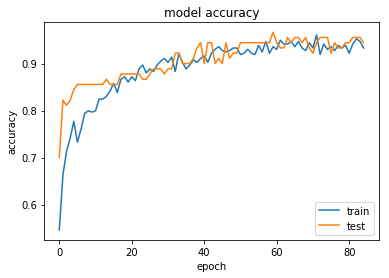

In [7]:
plt.figure(1)
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'lower right')
plt.show()

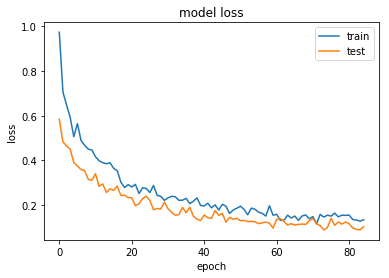

In [8]:
plt.figure(2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()